In [1]:
from simsopt._core import load
# replace "NAME_OF_FILE_YOU_DOWNLOADED" with the name you gave the file
surfaces, ma, coils = load(f'serial0229079.json')

In [2]:
from mayavi import mlab

for coil in coils:
    coil.plot(engine="mayavi", show=False)

mlab.show()

In [8]:
for surf in surfaces:
    surf.plot(engine='mayavi', show=False)
mlab.show()

In [3]:
from pyoculus.problems import SimsoptBfieldProblem, surf_from_coils

In [4]:
surf = surf_from_coils(coils, ncoils=3, mpol=5, ntor=5)

{'ncoils': 3, 'mpol': 5, 'ntor': 5}


In [13]:
surf.plot(engine='mayavi', show=False)
mlab.show()

In [5]:
R0, _, Z0 = ma.gamma()[0,:]
ps = SimsoptBfieldProblem.from_coils(R0=R0, Z0=Z0, Nfp=3, coils=coils, interpolate=True, ncoils=3, mpol=5, ntor=5, n=40)

{'ncoils': 3, 'mpol': 5, 'ntor': 5, 'n': 40}


In [6]:
import numpy as np

In [7]:
phis = [0]    #[(i / 4) * (2 * np.pi / nfp) for i in range(4)]

nfieldlines = 40
Rs = np.linspace(0.869, 1.3, nfieldlines)
Zs = np.zeros_like(Rs)
RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

# nfieldlines = 2
# p1 = np.array([5.6144507858315915, -0.8067790944375764])
# p2 = np.array([5.78, -0.6])
# Rs = np.linspace(p1[0], p2[0], nfieldlines)
# Zs = np.linspace(p1[1], p2[1], nfieldlines)
# Rs, Zs = np.meshgrid(Rs, Zs)
# RZs2 = np.array([[r, z] for r, z in zip(Rs.flatten(), Zs.flatten())])

# RZs = np.concatenate((RZs, RZs2))

In [8]:
ps._mf_B.estimate_error_B(10000)

(0.09192514378562332, 0.10725852497898226)

In [9]:
from horus import poincare

In [10]:
pplane = poincare(ps._mf_B, RZs, phis, ps.surfclassifier, tol = 1e-10, plot=False)

In [11]:
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.style.use('lateky')

In [62]:
plt.ioff()
fig, ax = pplane.plot(phis)
ax = ax[0,0]

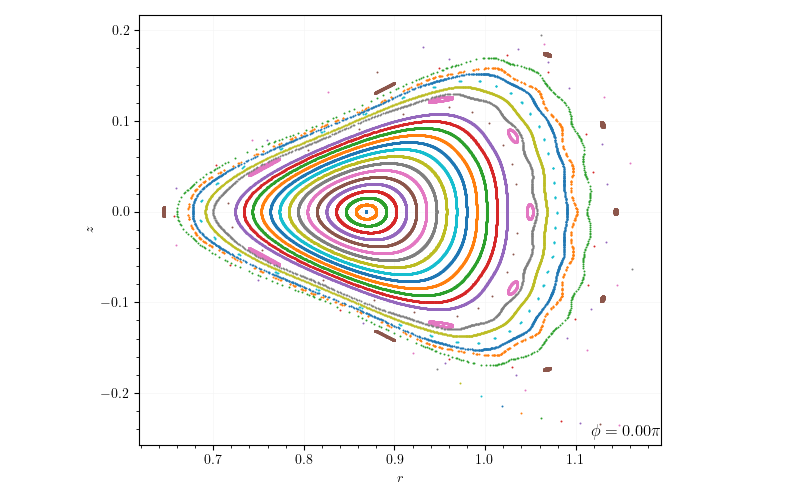

In [63]:
display(fig.canvas)

In [14]:
import horus as ho

In [64]:
gamma = ho.trace(ps._mf, 9*2*np.pi, [1.14386, 0, 0.0], tol=1e-10)[0]

In [65]:
mlab.plot3d(gamma[0, :], gamma[1, :], gamma[2, :], tube_radius=0.01, color=(0, 0, 1))
mlab.show()

In [15]:
from pyoculus.problems import FixedPoint

In [16]:
# set up the integrator
iparams = dict()
iparams["rtol"] = 1e-12

pparams = dict()
pparams["nrestart"] = 0
pparams["tol"] = 1e-18
pparams['niter'] = 100

fp1 = FixedPoint(ps, pparams, integrator_params=iparams)
fp2 = FixedPoint(ps, pparams, integrator_params=iparams)

In [19]:
fp1.compute(guess=[1.13535758, 0.07687874], pp=3, qq=8, sbegin=0.62, send=1.2, checkonly=True)

0 - [DeltaR, DeltaZ] : [-8.95871599e-10 -7.13518686e-09] - dtheta : 12.566370181316584
0 - [StepR, StepZ]: [2.90005286e-09 3.89053438e-09]
1 - RZ : [1.13535758 0.07687874] - rhotheta : [0.27758195 0.28062758]
1 - [DeltaR, DeltaZ] : [-1.28785871e-14  9.99200722e-15] - dtheta : 12.566370157734251


In [20]:
fp2.compute(guess=[1.14374773, 0.0203871], pp=3, qq=8, sbegin=0.62, send=1.2, checkonly=True)

0 - [DeltaR, DeltaZ] : [ 8.03439981e-10 -4.97214751e-09] - dtheta : 12.566369933661267
0 - [StepR, StepZ]: [ 4.05947653e-09 -4.37089730e-09]
1 - RZ : [1.14374773 0.0203871 ] - rhotheta : [0.27586795 0.07396908]
1 - [DeltaR, DeltaZ] : [-2.8643754e-14 -2.3411828e-14] - dtheta : 12.56636991895008


In [21]:
results1 = [list(p) for p in zip(fp1.x, fp1.y, fp1.z)]
results2 = [list(p) for p in zip(fp2.x, fp2.y, fp2.z)]

In [22]:
results1

[[1.1353575829000528, 0.0, 0.07687874389053438],
 [1.143747734059569, 0.0, -0.020387095626251402],
 [1.1219137549903382, 0.0, -0.11479070097737704],
 [1.0459821498623518, 0.0, -0.18274170375174756],
 [0.8172764320278105, 0.0, -0.10375158018822576],
 [0.659178494587964, 0.0, 0.03092231918060684],
 [0.9485234630485577, 0.0, 0.16641620861401937],
 [1.0871668505080696, 0.0, 0.16104024047929044],
 [1.13535758290004, 0.0, 0.07687874389054437]]

In [23]:
results2

[[1.1437477340594766, 0.0, 0.0203870956291027],
 [1.135357582900743, 0.0, -0.07687874388776238],
 [1.0871668505103453, 0.0, -0.16104024047728116],
 [0.9485234630555037, 0.0, -0.16641620861730408],
 [0.65917849459208, 0.0, -0.030922319184728028],
 [0.8172764320172968, 0.0, 0.10375158018388073],
 [1.0459821498590451, 0.0, 0.1827417037526993],
 [1.121913754989247, 0.0, 0.1147907009799376],
 [1.143747734059448, 0.0, 0.02038709562907929]]

In [24]:
gamma = ho.trace(ps._mf, 9*2*np.pi, results1[0], tol=1e-10)[0]

mlab.plot3d(gamma[0, :], gamma[1, :], gamma[2, :], tube_radius=0.01, color=(0, 0, 1))
mlab.show()

In [64]:
for rr in results1:
    ax.scatter(rr[0], rr[2], marker="X", edgecolors="black", linewidths=1)

for rr in results2:
    ax.scatter(rr[0], rr[2], marker="X", edgecolors="black", linewidths=1)

In [35]:
ax.scatter(results1[0][0], results1[0][2], marker="X", edgecolors="black", linewidths=1)
ax.scatter(results2[0][0], results2[0][2], marker="X", edgecolors="black", linewidths=1)

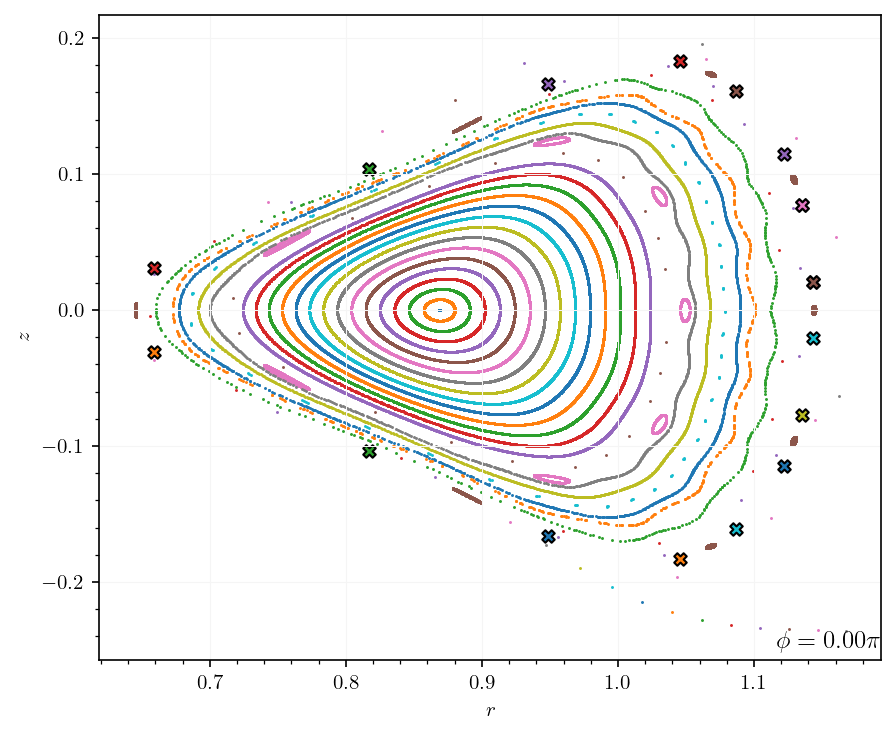

In [26]:
fig

It is a $q=16/6$ 

In [28]:
from pyoculus.solvers import Manifold
iparam = dict()
iparam["rtol"] = 1e-13

mp = Manifold(ps, fp1, fp2, integrator_params=iparam)

In [48]:
mp.choose(0, 0, stability=["u", "s"], signs=[1, 1])

In [49]:
mp.compute(nintersect = 6, epsilon= 1e-3, neps = 30)

2024-05-26 20:21:32 [info     ] Computing unstable manifold with postive epsilon...
2024-05-26 20:23:27 [info     ] Computing stable manifold with positive epsilon...


In [65]:
mp.plot(ax=ax)

2024-05-26 20:51:13 [warning  ] Manifold u- not computed.
2024-05-26 20:51:13 [warning  ] Manifold s- not computed.


(<Figure size 1200x750 with 1 Axes>,
 <Axes: title={'right': '$\\phi = 0.00\\pi$ '}, xlabel='$r$', ylabel='$z$'>)

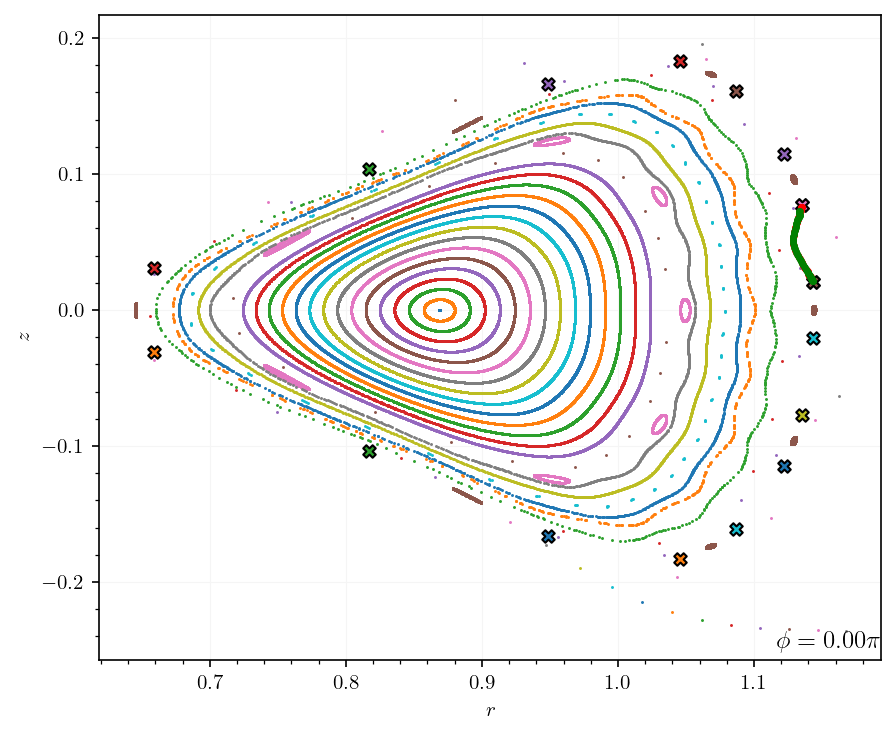

In [54]:
fig

In [55]:
mp.find_homoclinic(1e-3, 1e-3, jac=False)

2024-05-26 20:41:02 [debug    ] Guess - 0.001, 0.001
2024-05-26 20:41:02 [debug    ] Bounds - ((0.001, 0.0021600076402865072), (0.001, 0.002158862150101467))
2024-05-26 20:41:02 [debug    ] n_s, n_u - 5, 5
2024-05-26 20:41:02 [debug    ] Inside : (0.0010000000000000002, 0.0010000000000000002)
2024-05-26 20:41:07 [debug    ] Returns - (array([1.1290709 , 0.05511283]), array([1.13230078, 0.04019071]), array([-0.00322987,  0.01492213]))
2024-05-26 20:41:07 [debug    ] Inside : (0.0010000000000000002, 0.0010000000000000002)
2024-05-26 20:41:11 [debug    ] Returns - (array([1.1290709 , 0.05511283]), array([1.13230078, 0.04019071]), array([-0.00322987,  0.01492213]))
2024-05-26 20:41:11 [debug    ] Inside : (0.0010000000000000002, 0.0010000000000000002)
2024-05-26 20:41:15 [debug    ] Returns - (array([1.1290709 , 0.05511283]), array([1.13230078, 0.04019071]), array([-0.00322987,  0.01492213]))
2024-05-26 20:41:15 [debug    ] Inside : (0.00100000010293358, 0.0010000000000000002)
2024-05-26 2

(0.0004935714362365777, 0.0009447855326874471)

In [60]:
fund = mp.fundamental_segment
guess_i = [fund[0][1]*np.power(mp.lambda_s, 1/2), fund[1][0]*np.power(mp.lambda_u, 1/2)]
print(f"initial guess: {guess_i}")

initial guess: [0.0007316896189876429, 0.001378277537890097]


In [61]:
mp.find_homoclinic(*guess_i, n_s=4, n_u=5, jac=False)

2024-05-26 20:48:13 [debug    ] Guess - 0.0007316896189876429, 0.001378277537890097
2024-05-26 20:48:13 [debug    ] Bounds - ((0.0007316896189876429, 0.0015800628185817691), (0.001378277537890097, 0.0029827427439305223))
2024-05-26 20:48:13 [debug    ] n_s, n_u - 4, 5
2024-05-26 20:48:13 [debug    ] Inside : (0.0007316896189876431, 0.0013782775378900973)
2024-05-26 20:48:16 [debug    ] Returns - (array([1.13522221, 0.03479514]), array([1.13527743, 0.0347237 ]), array([-5.52189984e-05,  7.14391296e-05]))
2024-05-26 20:48:16 [debug    ] Inside : (0.0007316896189876431, 0.0013782775378900973)
2024-05-26 20:48:21 [debug    ] Returns - (array([1.13522221, 0.03479514]), array([1.13527743, 0.0347237 ]), array([-5.52189984e-05,  7.14391296e-05]))
2024-05-26 20:48:21 [debug    ] Inside : (0.0007316896189876431, 0.0013782775378900973)
2024-05-26 20:48:25 [debug    ] Returns - (array([1.13522221, 0.03479514]), array([1.13527743, 0.0347237 ]), array([-5.52189984e-05,  7.14391296e-05]))
2024-05-26 

(0.0007235978655974428, 0.0013857136248873365)

In [71]:
mp.clinics

[(0.0009447855326874471,
  0.0004935714362365777,
  0.0009447855326874471,
  array([1.13170684, 0.04118916]),
  array([1.13170685, 0.04118915])),
 (0.0013857136248873394,
  0.0007235978655974428,
  0.0013857136248873365,
  array([1.13531588, 0.03463726]),
  array([1.13531588, 0.03463726]))]

In [66]:
marker = ["P", "o", "s", "p", "P", "*", "X", "D", "d", "^", "v", "<", ">"]
for i, clinic in enumerate(mp.clinics):
    eps_s_i, eps_u_i = clinic[1:3]

    n_u = 8
    # hs_i = mp.integrate(mp.rfp_s + eps_s_i * mp.vector_s, n_s, -1)
    hu_i = mp.integrate(mp.rfp_u + eps_u_i * mp.vector_u, n_u, 1)
    # ax.scatter(hs_i[0,:], hs_i[1,:], marker=marker[i], color="purple", zorder=10)
    ax.scatter(hu_i[0,:], hu_i[1,:], marker=marker[i], color="royalblue", edgecolor='cyan', zorder=10)

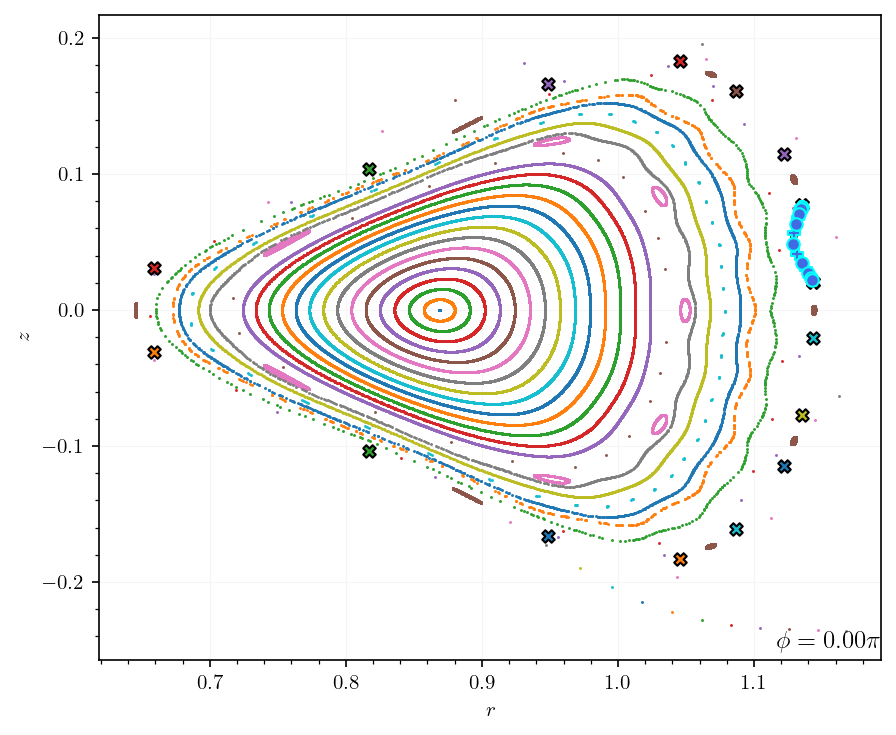

In [67]:
fig

In [68]:
mp.resonance_area()

2024-05-26 20:54:40 [info     ] Forward integration goes beyond stable saddle point.
2024-05-26 20:54:40 [debug    ] rfp: [1.14374773 0.0203871 ], rz_end: [1.14380703 0.02057142], rz: [1.14373332 0.02053429]
2024-05-26 20:55:30 [info     ] Backward integration goes beyond stable saddle point.
2024-05-26 20:55:30 [debug    ] rfp: [1.13535758 0.07687874], rz_end: [1.13549204 0.0766172 ], rz: [1.13537325 0.07661411]
2024-05-26 20:55:30 [info     ] Potential integration completed for homo/hetero-clinic point of order : 9.448e-04
2024-05-26 20:56:21 [info     ] Forward integration goes beyond stable saddle point.
2024-05-26 20:56:21 [debug    ] rfp: [1.14374773 0.0203871 ], rz_end: [1.14380277 0.02060548], rz: [1.1437126  0.02058444]
2024-05-26 20:57:09 [info     ] Backward integration goes beyond stable saddle point.
2024-05-26 20:57:09 [debug    ] rfp: [1.13535758 0.07687874], rz_end: [1.13552318 0.07652587], rz: [1.13536852 0.07650039]
2024-05-26 20:57:09 [info     ] Potential integratio

(array([ 1.4907224e-05, -1.4907224e-05]),
 [[array([1.37535199, 1.37617571, 1.37658507, 1.37676787, 1.37685107,
          1.37689058, 1.37691147]),
   array([-1.37468193, -1.37524901, -1.37613058, -1.37656807, -1.37676149,
          -1.37684957, -1.37689265])],
  [array([1.37582857, 1.37642527, 1.37669645, 1.37681867, 1.37687578,
          1.37690496]),
   array([-1.37489505, -1.37479379, -1.37575441, -1.37639704, -1.37668602,
          -1.37681603, -1.37687844])]],
 [[[array([1.13805056, 0.03010407]),
    array([1.14123172, 0.02480266]),
    array([1.14261245, 0.02241005]),
    array([1.14322735, 0.02131901]),
    array([1.14351193, 0.02082059]),
    array([1.14365157, 0.02060337]),
    array([1.14373332, 0.02053429])],
   [array([1.12940446, 0.05642364]),
    array([1.13247026, 0.06740727]),
    array([1.13411574, 0.07259223]),
    array([1.13480936, 0.07491466]),
    array([1.13511591, 0.07596542]),
    array([1.1352695 , 0.07643383]),
    array([1.13537325, 0.07661411])]],
  [[arra

In [69]:
mp.areas

array([[ 1.49072240e-05,  2.07233102e-05,  1.91319854e-05],
       [-1.49072240e-05,  2.07233102e-05,  1.91319854e-05]])

In [70]:
mp.areas[:, 0].sum()

0.0